<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/R_Clusters_Exemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Cluster Exemplo 3
Análise de clusters em dados binários

##Instalando e carregando as bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"plot3D" %in% installed.packages()){
    install.packages("plot3D")}
if(!"plotly" %in% installed.packages()){
    install.packages("plotly")}   
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"cluster" %in% installed.packages()){
    install.packages("cluster")} 
if(!"factoextra" %in% installed.packages()){
    install.packages("factoextra")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
if(!"ade4" %in% installed.packages()){
    install.packages("ade4")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(plot3D)
library(plotly)
library(htmltools)
library(cluster)
library(factoextra)
library(ggrepel)
library(ade4)
library(purrr)
library(tidyverse) 

## Importando, vizualizando e tratando os dados

In [5]:
load(url("https://github.com/FranziskoB/Clusters/raw/main/dados/Pesquisa%20Bin%C3%A1ria.RData"))


Contexto: são respostas binárias para 50 perguntas de 35 respondentes

Os respondentes são gestores de empresas em 3 setores distintos

In [15]:
head(PesquisaBinária, n=10) #Visualizando os dados

q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,⋯,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>
0,0,0,0,0,1,0,0,0,1,⋯,0,1,0,0,0,0,0,1,0,1
0,1,0,0,0,0,0,1,1,0,⋯,1,0,1,1,1,0,1,0,1,2
0,1,0,1,0,1,0,1,1,0,⋯,1,0,1,0,0,0,1,0,1,2
1,0,1,1,0,1,0,0,0,1,⋯,1,0,1,0,1,0,1,0,1,3
1,0,0,1,1,1,0,0,1,1,⋯,0,0,1,0,1,0,1,0,1,3
1,1,0,1,0,0,0,1,1,0,⋯,1,0,1,0,1,0,1,0,1,2
0,1,0,1,1,0,0,0,0,0,⋯,1,1,1,0,1,0,1,0,1,3
1,0,1,0,1,1,0,0,0,1,⋯,1,0,1,0,1,0,1,0,1,3
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


Estatísticas descritivas

In [16]:
vetor_var <- names(PesquisaBinária)
map(PesquisaBinária[vetor_var], ~ summary(as.factor(.))) #Contagem de quantas vezes o número 1 e 0 aparece

$q1
 0  1 
25 10 

$q2
 0  1 
20 15 

$q3
 0  1 
26  9 

$q4
 0  1 
22 13 

$q5
 0  1 
24 11 

$q6
 0  1 
18 17 

$q7
 0  1 
22 13 

$q8
 0  1 
25 10 

$q9
 0  1 
19 16 

$q10
 0  1 
20 15 

$q11
 0  1 
25 10 

$q12
 0  1 
23 12 

$q13
 0  1 
15 20 

$q14
 0  1 
19 16 

$q15
 0  1 
23 12 

$q16
 0  1 
14 21 

$q17
 0  1 
29  6 

$q18
 0  1 
16 19 

$q19
 0  1 
26  9 

$q20
 0  1 
21 14 

$q21
 0  1 
30  5 

$q22
 0  1 
26  9 

$q23
 0  1 
25 10 

$q24
 0  1 
18 17 

$q25
 0  1 
15 20 

$q26
 0  1 
16 19 

$q27
 0  1 
17 18 

$q28
 0  1 
18 17 

$q29
 0  1 
29  6 

$q30
 0  1 
20 15 

$q31
 0  1 
11 24 

$q32
 0  1 
12 23 

$q33
 0  1 
11 24 

$q34
 0  1 
25 10 

$q35
 0  1 
32  3 

$q36
 0  1 
 9 26 

$q37
 0  1 
27  8 

$q38
 0  1 
29  6 

$q39
 0  1 
31  4 

$q40
 0  1 
 7 28 

$q41
 0  1 
30  5 

$q42
 0  1 
14 21 

$q43
 0  1 
22 13 

$q44
 0  1 
12 23 

$q45
 0  1 
26  9 

$q46
 0  1 
18 17 

$q47
 0 
35 

$q48
 0  1 
12 23 

$q49
 0  1 
27  8 

$q50
 0  1 
11 24 

$setor
 1  2  3 
11 12 12

##Esquema de aglomeração hierárquico
Matriz de dissimilaridades




In [20]:
matriz_D <- PesquisaBinária %>% 
  select(-setor) %>% 
  dist.binary(method = 2)# Em 'dist.binary', method = 2 indica similaridade por emparelhamento simples


Elaboração da clusterização hierárquica

In [22]:
cluster_hier <- agnes(x = matriz_D, method = "average")

Definição do esquema hierárquico de aglomeração

In [23]:
coeficientes <- sort(cluster_hier$height, decreasing = FALSE) 
coeficientes

[1] 0.0000000 0.1414214 0.1414214 0.1414214 0.2000000 0.3458035 0.3464102
 [8] 0.3741657 0.3741657 0.3741657 0.3827772 0.4000000 0.4000000 0.4236068
[15] 0.4242641 0.4472136 0.4472136 0.4502587 0.4527575 0.4560160 0.4581276
[22] 0.4690416 0.4793127 0.4805042 0.4850306 0.4988372 0.4990959 0.5054415
[29] 0.5099020 0.5201551 0.5211280 0.5437994 0.6965222 0.7160760

Tabela com o esquema de aglomeração

In [25]:
esquema <- as.data.frame(cbind(cluster_hier$merge, coeficientes))
names(esquema) <- c("Cluster1", "Cluster2", "Coeficientes")

display_html(HTML(esquema %>%
  kable(row.names = T) %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE, 
                font_size = 20)))

,Cluster1,Cluster2,Coeficientes
1,-18,-33,0.0000000
2,-19,-34,0.1414214
3,-17,-32,0.1414214
4,-16,-31,0.1414214
5,-20,-35,0.2000000
6,3,2,0.3458035
7,-23,-27,0.3464102
8,-21,7,0.3741657
9,1,-26,0.3741657
10,-11,-14,0.3741657


Construção do dendrograma

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


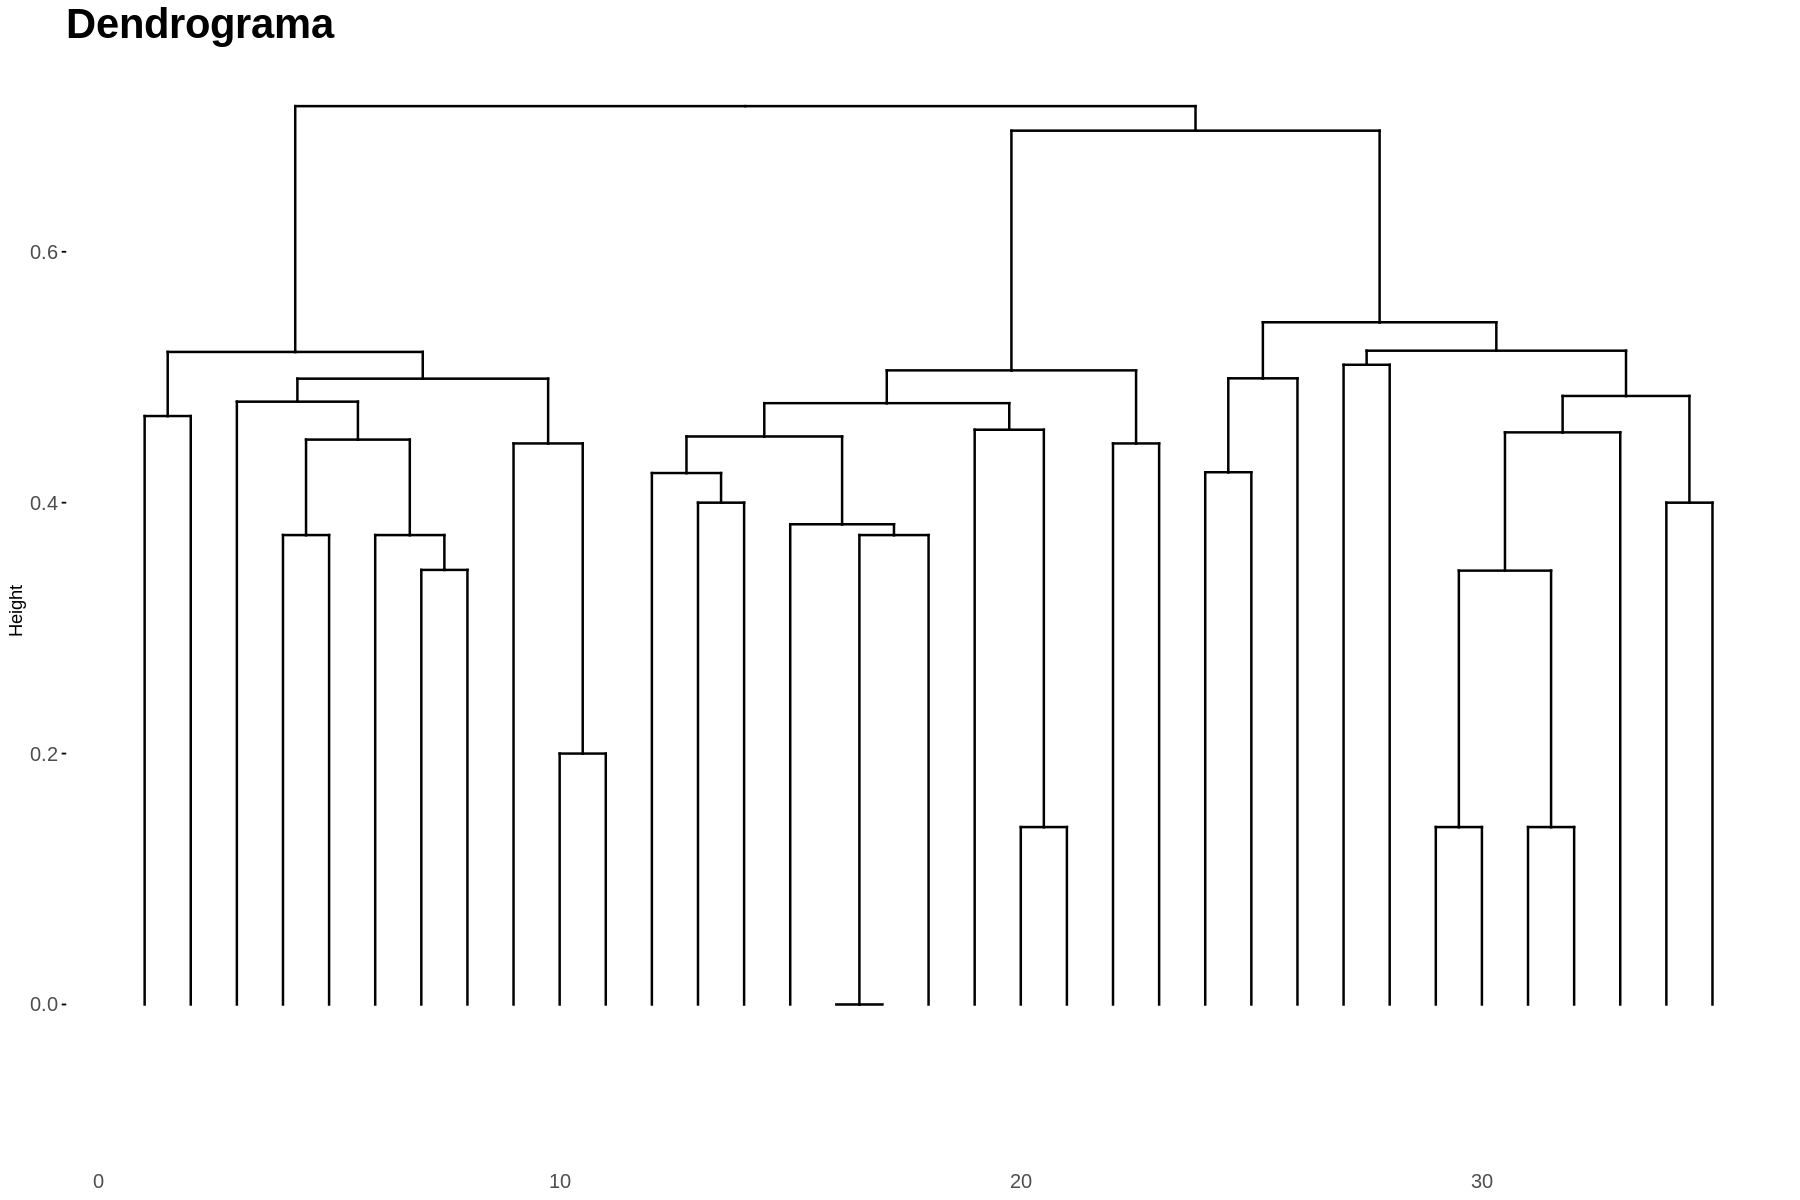

In [28]:
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
fviz_dend(x = cluster_hier, show_labels = F,main = "") +
ggtitle("Dendrograma") +
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Dendrograma com visualização dos clusters

Parametrizando 3 clusters para comparar com setores

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


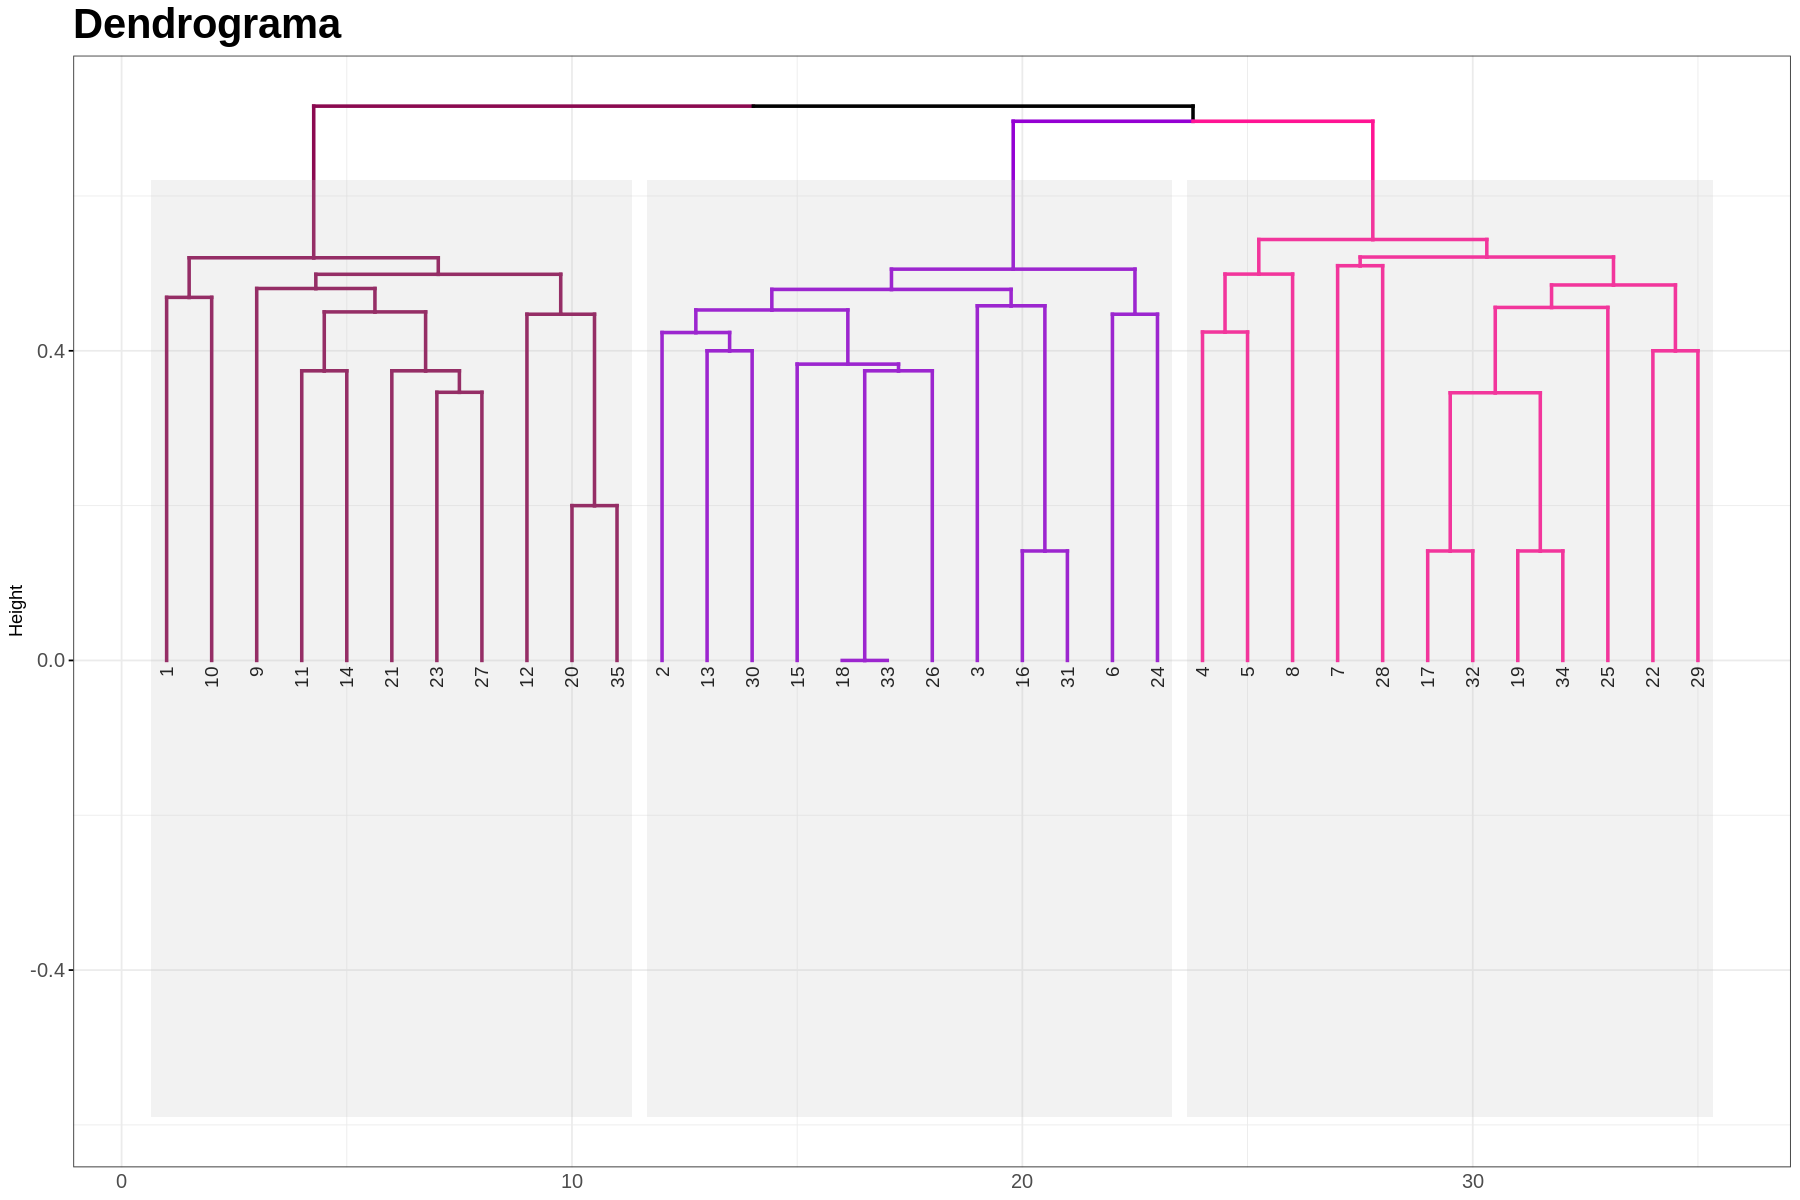

In [31]:
fviz_dend(x = cluster_hier,
          k = 3,
          k_colors = c("deeppink4", "darkviolet", "deeppink"),
          color_labels_by_k = F,
          rect = T,
          rect_fill = T,
          lwd = 1,
          ggtheme = theme_bw()) +
ggtitle("Dendrograma") +
  
theme(plot.title = element_text(family = "Helvetica",
      face = "bold", size = (25)),
      axis.text.x = element_text(size = 12),
      axis.text.y = element_text(size = 12))

Criando variável categórica para indicação do cluster no banco de dados

 O argumento 'k' indica a quantidade de clusters

In [33]:
PesquisaBinária$cluster_H <- factor(cutree(tree = cluster_hier, k = 3))

Visualização da base de dados com a alocação das observações nos clusters

In [34]:
display_html(HTML(PesquisaBinária %>%
  select(setor, cluster_H) %>%
  arrange(setor) %>% 
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 20)))

setor,cluster_H
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
1,1
